<a href="https://colab.research.google.com/github/gabrielhenriquess/TelecomX_II/blob/main/TelecomX_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#üìä TelecomX ‚Äì Parte 2: Predi√ß√£o de Evas√£o (Evas√£o)
###Pipeline simples e did√°tico: prepara√ß√£o ‚Üí modelagem ‚Üí avalia√ß√£o ‚Üí interpreta√ß√£o.


##üõ† Etapa 1 ‚Äî Carregar e inspecionar os dados

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
)
from imblearn.over_sampling import SMOTE


##üìå Etapa 2 - Carregar dados

In [109]:
df = pd.read_csv('/content/telecomx_tratado.csv')
df.head()


id_cliente evasao    sexo categoria_idoso tem_parceiro tem_dependentes  \
0  0002-ORFBO    nao  mulher             nao          sim             sim   
1  0003-MKNFE    nao   homem             nao          nao             nao   
2  0004-TLHLJ    sim   homem             nao          nao             nao   
3  0011-IGKFF    sim   homem             sim          sim             nao   
4  0013-EXCHZ    sim  mulher             sim          sim             nao   

   tempo_contrato telefone_ativo multiplas_linhas tipo_internet  ...  \
0               9            sim              nao           dsl  ...   
1               9            sim              sim           dsl  ...   
2               4            sim              nao         fibra  ...   
3              13            sim              nao         fibra  ...   
4               3            sim              nao         fibra  ...   

  protecao_aparelho suporte_online tv_stream filmes_stream modelo_contrato  \
0               nao            sim       sim           nao           anual   
1               nao            nao       nao           sim          mensal   
2               sim            nao       nao           nao          mensal   
3               sim            nao       sim           sim          mensal   
4               nao            sim       sim           nao          mensal   

  fatura_online       pagamento media_diaria mensalidade  total_gasto  
0           sim  cheque_correio         2.20        65.6       593.30  
1           nao  cheque_correio         2.01        59.9       542.40  
2           sim   cheque_online         2.34        73.9       280.85  
3           sim   cheque_online         3.17        98.0      1237.85  
4           sim  cheque_correio         2.97        83.9       267.40  

[5 rows x 22 columns]

##üìå Etapa 2.1 ‚Äî An√°lise explorat√≥ria inicia

In [110]:
# 1. Matriz de correla√ß√£o (apenas num√©ricas)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correla√ß√£o")
plt.show()

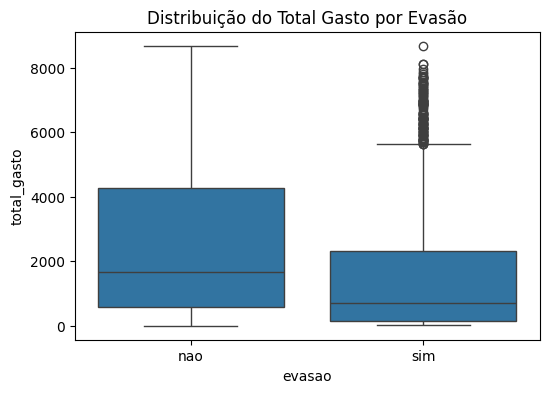

In [111]:
# 2. Boxplot: Total gasto x Evas√£o
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='evasao', y='total_gasto')
plt.title("Distribui√ß√£o do Total Gasto por Evas√£o")
plt.show()

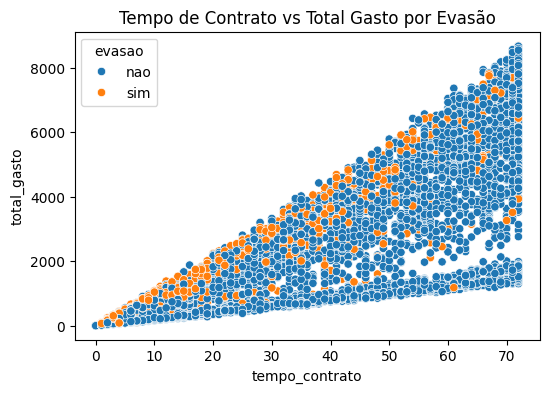

In [112]:
# 3. Scatter plot: Tempo de contrato vs Total gasto
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='tempo_contrato', y='total_gasto', hue='evasao')
plt.title("Tempo de Contrato vs Total Gasto por Evas√£o")
plt.show()

In [113]:
# 4. Histograma: propor√ß√£o de evas√£o
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='evasao')
plt.title("Propor√ß√£o de clientes que evadiram")
plt.ylabel("Quantidade")
plt.show()

# Mostrar valores absolutos e proporcionais
print("Contagem de evas√£o:\n", df['evasao'].value_counts())
print("\nPropor√ß√£o de evas√£o:\n", df['evasao'].value_counts(normalize=True).round(2))

Contagem de evas√£o:
 evasao
nao    5174
sim    1869
Name: count, dtype: int64

Propor√ß√£o de evas√£o:
 evasao
nao    0.73
sim    0.27
Name: proportion, dtype: float64


##üìå Etapa 2.2 ‚Äî Resumo estat√≠stico dos dados

In [114]:
# Estat√≠sticas descritivas das vari√°veis num√©ricas
print("üìä Estat√≠sticas descritivas (num√©ricas):")
display(df.describe())

# Estat√≠sticas descritivas das vari√°veis categ√≥ricas
print("\nüìä Estat√≠sticas descritivas (categ√≥ricas):")
display(df.describe(include=['object']))

# Conferir valores √∫nicos por coluna (√∫til para encoding)
print("\nüîç Valores √∫nicos por coluna:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores √∫nicos")


üìä Estat√≠sticas descritivas (num√©ricas):


tempo_contrato  media_diaria  mensalidade  total_gasto
count     7043.000000   7032.000000  7043.000000  7043.000000
mean        32.371149      2.159879    64.761692  2279.734304
std         24.559481      1.006217    30.090047  2266.794470
min          0.000000      0.460000    18.250000     0.000000
25%          9.000000      1.207500    35.500000   398.550000
50%         29.000000      2.350000    70.350000  1394.550000
75%         55.000000      3.010000    89.850000  3786.600000
max         72.000000      4.050000   118.750000  8684.800000


üìä Estat√≠sticas descritivas (categ√≥ricas):


id_cliente evasao   sexo categoria_idoso tem_parceiro tem_dependentes  \
count         7043   7043   7043            7043         7043            7043   
unique        7043      2      2               2            2               2   
top     9995-HOTOH    nao  homem             nao          nao             nao   
freq             1   5174   3555            5901         3641            4933   

       telefone_ativo multiplas_linhas tipo_internet seguranca_online  \
count            7043             7043          7043             7043   
unique              2                3             3                3   
top               sim              nao         fibra              nao   
freq             6361             3390          3096             3498   

       backup_nuvem protecao_aparelho suporte_online tv_stream filmes_stream  \
count          7043              7043           7043      7043          7043   
unique            3                 3              3         3             3   
top             nao               nao            nao       nao           nao   
freq           3088              3095           3473      2810          2785   

       modelo_contrato fatura_online      pagamento  
count             7043          7043           7043  
unique               3             2              4  
top             mensal           sim  cheque_online  
freq              3875          4171           2365


üîç Valores √∫nicos por coluna:
id_cliente: 7043 valores √∫nicos
evasao: 2 valores √∫nicos
sexo: 2 valores √∫nicos
categoria_idoso: 2 valores √∫nicos
tem_parceiro: 2 valores √∫nicos
tem_dependentes: 2 valores √∫nicos
tempo_contrato: 73 valores √∫nicos
telefone_ativo: 2 valores √∫nicos
multiplas_linhas: 3 valores √∫nicos
tipo_internet: 3 valores √∫nicos
seguranca_online: 3 valores √∫nicos
backup_nuvem: 3 valores √∫nicos
protecao_aparelho: 3 valores √∫nicos
suporte_online: 3 valores √∫nicos
tv_stream: 3 valores √∫nicos
filmes_stream: 3 valores √∫nicos
modelo_contrato: 3 valores √∫nicos
fatura_online: 2 valores √∫nicos
pagamento: 4 valores √∫nicos
media_diaria: 354 valores √∫nicos
mensalidade: 1585 valores √∫nicos
total_gasto: 6531 valores √∫nicos


##üìå Etapa 3 - Checagens r√°pidas

In [115]:
print(df.shape)
print(df.columns.tolist()[:25])
df.info()
df.isnull().sum().sort_values(ascending=False).head(10)


(7043, 22)
['id_cliente', 'evasao', 'sexo', 'categoria_idoso', 'tem_parceiro', 'tem_dependentes', 'tempo_contrato', 'telefone_ativo', 'multiplas_linhas', 'tipo_internet', 'seguranca_online', 'backup_nuvem', 'protecao_aparelho', 'suporte_online', 'tv_stream', 'filmes_stream', 'modelo_contrato', 'fatura_online', 'pagamento', 'media_diaria', 'mensalidade', 'total_gasto']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_cliente         7043 non-null   object 
 1   evasao             7043 non-null   object 
 2   sexo               7043 non-null   object 
 3   categoria_idoso    7043 non-null   object 
 4   tem_parceiro       7043 non-null   object 
 5   tem_dependentes    7043 non-null   object 
 6   tempo_contrato     7043 non-null   int64  
 7   telefone_ativo     7043 non-null   object 
 8   multiplas_linhas   7043 non-null   ob

media_diaria        11
id_cliente           0
sexo                 0
categoria_idoso      0
tem_parceiro         0
evasao               0
tem_dependentes      0
tempo_contrato       0
multiplas_linhas     0
telefone_ativo       0
dtype: int64

##üìå Etapa 4 ‚Äî Remover colunas irrelevantes

In [116]:
# Remover coluna de identificador, se existir
if 'id_cliente' in df.columns:
    df = df.drop(columns=['id_cliente'])

df.head()


evasao    sexo categoria_idoso tem_parceiro tem_dependentes  tempo_contrato  \
0    nao  mulher             nao          sim             sim               9   
1    nao   homem             nao          nao             nao               9   
2    sim   homem             nao          nao             nao               4   
3    sim   homem             sim          sim             nao              13   
4    sim  mulher             sim          sim             nao               3   

  telefone_ativo multiplas_linhas tipo_internet seguranca_online  ...  \
0            sim              nao           dsl              nao  ...   
1            sim              sim           dsl              nao  ...   
2            sim              nao         fibra              nao  ...   
3            sim              nao         fibra              nao  ...   
4            sim              nao         fibra              nao  ...   

  protecao_aparelho suporte_online tv_stream filmes_stream modelo_contrato  \
0               nao            sim       sim           nao           anual   
1               nao            nao       nao           sim          mensal   
2               sim            nao       nao           nao          mensal   
3               sim            nao       sim           sim          mensal   
4               nao            sim       sim           nao          mensal   

  fatura_online       pagamento media_diaria  mensalidade  total_gasto  
0           sim  cheque_correio         2.20         65.6       593.30  
1           nao  cheque_correio         2.01         59.9       542.40  
2           sim   cheque_online         2.34         73.9       280.85  
3           sim   cheque_online         3.17         98.0      1237.85  
4           sim  cheque_correio         2.97         83.9       267.40  

[5 rows x 21 columns]

##üìå Etapa 5 - Separar alvo e features (antes do encoding)

In [117]:
# Caso alvo esteja em texto 'evasao' (sim/nao)
if 'evasao' in df.columns:
    y = df['evasao'].astype(str).str.strip().str.lower().map({'sim':1, 'nao':0})
    X = df.drop(columns=['evasao'])
# Caso alvo j√° esteja em dummy 'evasao_sim'
elif 'evasao_sim' in df.columns:
    y = df['evasao_sim'].astype(int)
    X = df.drop(columns=['evasao_sim'])
else:
    raise ValueError("N√£o encontrei a coluna alvo ('evasao' ou 'evasao_sim').")


##üìå Etapa 6 -  One-Hot Encoding

In [118]:
X = pd.get_dummies(X, drop_first=True)


##üìå Etapa 7 - Imputa√ß√£o de nulos

In [119]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


##üìå Etapa 8 - Balanceamento com SMOTE

In [120]:
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_imputed, y)

pd.Series(y_bal).value_counts(normalize=True)


evasao
0    0.5
1    0.5
Name: proportion, dtype: float64

##üìå Etapa 9 - Normaliza√ß√£o (necess√°ria para LogReg/KNN/SVM)

In [121]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_bal)


##üìå Etapa 10 - Split treino/teste (70/30)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_bal, test_size=0.3, random_state=42
)


##üìå Etapa 11 - Treinar modelos

In [123]:
# Regress√£o Log√≠stica
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

##üìå Etapa 12 - Avalia√ß√£o (relat√≥rio + matriz)

In [124]:
print("üìä Regress√£o Log√≠stica")
y_pred_log = log_model.predict(X_test)
print(classification_report(y_test, y_pred_log))
print("Matriz de Confus√£o:\n", confusion_matrix(y_test, y_pred_log))

print("\nüå≤ Random Forest")
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print("Matriz de Confus√£o:\n", confusion_matrix(y_test, y_pred_rf))


üìä Regress√£o Log√≠stica
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1588
           1       0.73      0.81      0.77      1517

    accuracy                           0.77      3105
   macro avg       0.77      0.77      0.77      3105
weighted avg       0.77      0.77      0.77      3105

Matriz de Confus√£o:
 [[1141  447]
 [ 281 1236]]

üå≤ Random Forest
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1588
           1       0.87      0.83      0.85      1517

    accuracy                           0.86      3105
   macro avg       0.86      0.85      0.86      3105
weighted avg       0.86      0.86      0.86      3105

Matriz de Confus√£o:
 [[1401  187]
 [ 262 1255]]


##üìå Etapa 13 - Curva ROC + AUC (compara√ß√£o visual)

In [125]:
y_prob_log = log_model.predict_proba(X_test)[:, 1]
y_prob_rf  = rf_model.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf,  tpr_rf,  _ = roc_curve(y_test, y_prob_rf)

auc_log = auc(fpr_log, tpr_log)
auc_rf  = auc(fpr_rf,  tpr_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot(fpr_rf,  tpr_rf,  label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(); plt.show()


##üìå Etapa 14 - Import√¢ncia das vari√°veis (RF)

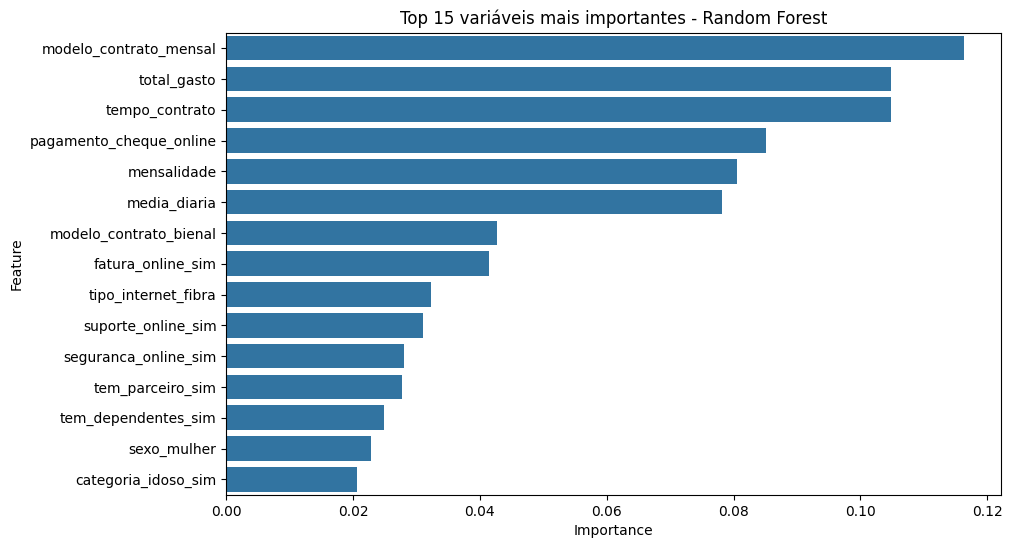

Feature  Importance
26        modelo_contrato_mensal    0.116408
3                    total_gasto    0.104859
0                 tempo_contrato    0.104834
29       pagamento_cheque_online    0.085178
2                    mensalidade    0.080564
1                   media_diaria    0.078254
25        modelo_contrato_bienal    0.042691
27             fatura_online_sim    0.041495
11           tipo_internet_fibra    0.032297
20            suporte_online_sim    0.031044
14          seguranca_online_sim    0.028076
6               tem_parceiro_sim    0.027786
7            tem_dependentes_sim    0.024880
4                    sexo_mulher    0.022900
5            categoria_idoso_sim    0.020639
16              backup_nuvem_sim    0.020317
18         protecao_aparelho_sim    0.017058
10          multiplas_linhas_sim    0.016112
24             filmes_stream_sim    0.014735
30  pagamento_transferencia_auto    0.014127

In [126]:
importances = rf_model.feature_importances_
features = X.columns

feat_importance = pd.DataFrame({'Feature': features, 'Importance': importances}) \
                    .sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_importance.head(15), x='Importance', y='Feature')
plt.title("Top 15 vari√°veis mais importantes - Random Forest")
plt.show()

feat_importance.head(20)


##üìå Etapa 15 - Compara√ß√£o de m√©tricas (tabela + gr√°fico)

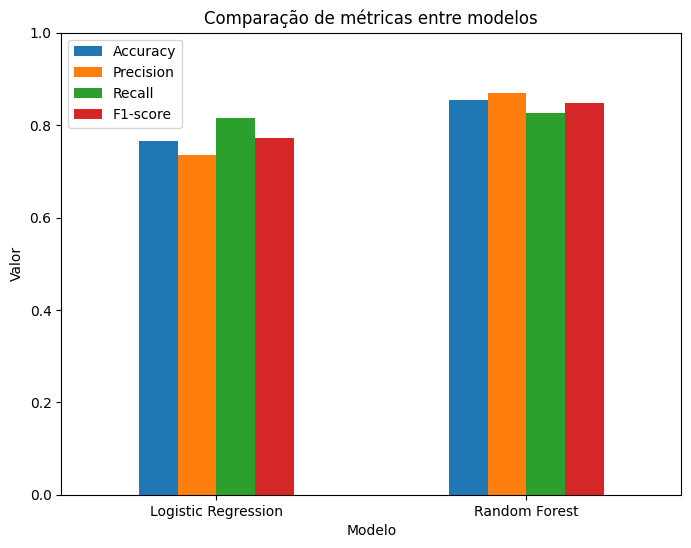

Modelo  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.765539   0.734403  0.814766   0.77250
1        Random Forest  0.855395   0.870319  0.827291   0.84826

In [127]:
metrics_df = pd.DataFrame({
    'Modelo': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_rf)],
    'Precision': [precision_score(y_test, y_pred_log), precision_score(y_test, y_pred_rf)],
    'Recall': [recall_score(y_test, y_pred_log), recall_score(y_test, y_pred_rf)],
    'F1-score': [f1_score(y_test, y_pred_log), f1_score(y_test, y_pred_rf)]
})

ax = metrics_df.set_index('Modelo').plot(kind='bar', figsize=(8,6))
plt.title("Compara√ß√£o de m√©tricas entre modelos")
plt.ylabel("Valor"); plt.ylim(0, 1); plt.xticks(rotation=0)
plt.show()

metrics_df


#üìå Etapa 16 ‚Äî Conclus√£o estrat√©gica

# üìä Conclus√µes e Recomenda√ß√µes Estrat√©gicas

## 1Ô∏è‚É£ Desempenho dos Modelos
- **Random Forest** apresentou o melhor desempenho geral, com maior F1-score, Recall e AUC.
- **Regress√£o Log√≠stica** tamb√©m obteve bons resultados, mas com desempenho levemente inferior ao RF.

## 2Ô∏è‚É£ Principais Fatores de Evas√£o
Com base na import√¢ncia das vari√°veis do Random Forest e na an√°lise explorat√≥ria:
- **Tempo de contrato**: clientes com pouco tempo de v√≠nculo tendem a evadir mais.
- **Tipo de contrato**: contratos mensais apresentam maior risco de evas√£o.
- **Total gasto**: clientes com menor gasto acumulado tendem a cancelar mais.
- **M√©todo de pagamento**: algumas formas de pagamento est√£o associadas a maior evas√£o (ex.: boleto).

## 3Ô∏è‚É£ Insights da An√°lise Explorat√≥ria
- Contratos de curto prazo e baixo gasto apresentam maior propor√ß√£o de evas√£o.
- O desbalanceamento inicial entre clientes ativos e evadidos foi significativo, justificando o uso do SMOTE.

## 4Ô∏è‚É£ Recomenda√ß√µes para a TelecomX
- Incentivar **contratos anuais ou semestrais**, oferecendo descontos e benef√≠cios.
- Criar **programas de fideliza√ß√£o** voltados para os primeiros meses de contrato.
- Estimular **pagamentos autom√°ticos** (d√©bito/cart√£o) para reduzir inadimpl√™ncia.
- Investir em campanhas direcionadas para **clientes de baixo gasto**.

---
üìå **Resumo Final**: O uso de modelos preditivos permite √† TelecomX antecipar riscos de evas√£o e agir preventivamente. A combina√ß√£o de an√°lises explorat√≥rias, modelagem e interpreta√ß√£o garante um suporte s√≥lido √† tomada de decis√£o.
